# Adaboost

Based on the book,  `Machine Learning in Action `

In [6]:
import numpy as np
import matplotlib.pyplot as plt

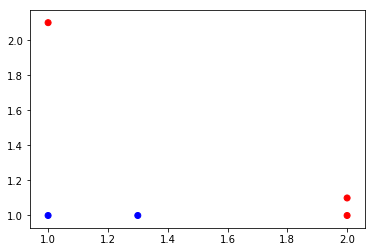

In [13]:
# define a data set
data=np.array([[1,2.1],[2,1.1],[1.3,1],[1,1],[2,1]])
label=np.array([1,1,-1,-1,1])
plt.scatter(data[:,0],data[:,1],c=['r' if i==1 else 'b' for i in label])

## Build a LoadDataSet function 

Basic function of loading data set from a file

In [1]:
def loadDataSet(fileName):
    numFeat=len(open(fileName).readline().split('\t'))
    
    dataMat=[]
    label=[]
    
    fr=open(fileName)
    for line in fr.readlines():
        lineArr=[]
        corLine=line.strip().split('\t')
        for i in range(numFeat-1):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        label.append(float(curLine[-1]))
    return dataMat,label

## Build a decision stump classifier

In [70]:
def stumpClassify(data,dime,thresVal,threshIneq):
    retArray=np.ones(data.shape[0])
    if threshIneq=="lt":
        retArray[data[:,dime]<=thresVal]=-1 
    else:
        retArray[data[:,dime]>thresVal]=-1
    return retArray
def buildStump(data,label,weight):
#     label=label.reshape(-1,1)
    m,n=data.shape
    numSteps=10
    bestStump={}
    bestClassEst=np.ones(m)
    minErr=np.inf
    
    for i in range(n):
        rangeMin=data[:,i].min()
        rangeMax=data[:,i].max()
        stepSize=(rangeMax-rangeMin)/numSteps
        
        for j in range(-1,numSteps+1):
            for inequal in ['lt','gt']:
                threshVal=rangeMin+j*stepSize
                predictLabels=stumpClassify(data,i,threshVal,inequal)
#                 print(label,predictLabels)
                errorArr=np.ones(data.shape[0])
                errorArr[predictLabels==label]=0
                weightedErr=weight@errorArr
#                 print("dim:",i," thresh:",threshVal," thresh inequality:",inequal," The weighted error rate:", weightedErr)
                if weightedErr<minErr:
                    minErr=weightedErr
                    bestClassEst=predictLabels.copy()
                    bestStump['dim']=i
                    bestStump['thresh']=threshVal
                    bestStump['ineq']=inequal
    return bestStump,minErr,bestClassEst


这两个方程通过单层决策树，以及穷举式的方法来找出最佳的分类器。

这个`buildStump`就是一个决策树的简化版本，是一个所谓的弱学习器，弱分类算法。

在之后一部分，我们将通过多个弱学习器来构建adaboost算法。

In [71]:
initialWeight=np.ones(data.shape[0])/5
# print("%.3f"%a)
buildStump(data,label,initialWeight)

({'dim': 0, 'thresh': 1.3, 'ineq': 'lt'},
 0.2,
 array([-1.,  1., -1., -1.,  1.]))

## Adaboost

To realise the Adaboost:

对每次迭代: 
- 利用buildStump()函数找到最佳的单层决策树
- 将最佳单层决策树加入到单层决策树数组 
- 计算alpha
- 计算新的权重向量D
- 更新累计类别估计值 
- 如果错误率等于0.0，则退出循环

In [74]:
def adaboostTrainDS(data,label,numberIter=40):
    '''
    Name:
        the `DS` means the base classifier is the decision stump. You can define the base classifier by yourself.
    Parameter:
    input: 
        data and its corresponding label, the numberIter is the number of iteration
    output:
        a list of weak learner machines containing the information and the corresponding alpha values.
        (the alphe value is used to combine all the classifier in the final step)
    '''
    weakClassifier=[]
    m=data.shape[0]
#     initialize the weight by average allocating
    weight=np.ones(m)/m
    aggClassEst=np.zeros(m)
    for i in range(numberIter):
        bestStump,error,bestClassEst=buildStump(data,label,weight)
#         print(weight)
        alpha=float(0.5*np.log((1-error)/max(error,1e-16)))
        bestStump['alpha']=alpha
        weakClassifier.append(bestStump)
#         print("predicted estimate: ",bestClassEst)      

        # these two lines of code update the weight vector
        weight=weight*np.exp((-alpha*label*bestClassEst)) 
        weight=weight/weight.sum()
        
        # combine all the weak classifier, and calculate the error rate 
        aggClassEst+=alpha*bestClassEst
        print("aggClassEst: ",aggClassEst)
        aggErrors=(np.sign(aggClassEst)!=label)*np.ones(m)
        errorRate=aggErrors.sum()/m
        print("total error: ",errorRate)
        if errorRate==0: break
    return weakClassifier

In [73]:
adaboostTrain(data,label,9)

aggClassEst:  [-0.69314718  0.69314718 -0.69314718 -0.69314718  0.69314718]
total error:  0.2
aggClassEst:  [ 0.27980789  1.66610226 -1.66610226 -1.66610226 -0.27980789]
total error:  0.2
aggClassEst:  [ 1.17568763  2.56198199 -0.77022252 -0.77022252  0.61607184]
total error:  0.0


[{'dim': 0, 'thresh': 1.3, 'ineq': 'lt', 'alpha': 0.6931471805599453},
 {'dim': 1, 'thresh': 1.0, 'ineq': 'lt', 'alpha': 0.9729550745276565},
 {'dim': 0, 'thresh': 0.9, 'ineq': 'lt', 'alpha': 0.8958797346140273}]

其实boost最后还是生成了好多个分类器，然后combine所有的分类器从而进行分类。

只不过生成这些分类器的过程叫boosting，即通过更新weight来生成新的训练集对weak learner进行训练产生不同的分类器。


### Reference：
[1] Machine Learning in Action

[2] 李宏毅老师的课程[资源](https://www.youtube.com/watch?v=tH9FH1DH5n0)